# Project 08: House Price Prediction Using Linear Regression

## Overview
This project uses the famous Boston Housing dataset to predict house prices based on various features such as number of rooms, crime rate, and accessibility to highways.

## Objectives
- Load and explore the dataset
- Visualize relationships between features and price
- Prepare data for regression modeling
- Train a Linear Regression model to predict house prices
- Evaluate model performance


## Step 1: Importing necessary libraries
We import Pandas and NumPy for data handling, Matplotlib and Seaborn for visualization, and sklearn modules for modeling and evaluation.



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid")
%matplotlib inline

## Step 2: Load the California Housing dataset
We load the dataset from sklearn and convert it into a DataFrame for easy analysis. The dataset contains various housing features and the target variable `MedHouseVal` (median house value).


In [5]:
housing = fetch_california_housing(as_frame=True)
housing_df = housing.frame
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Step 3: Dataset info and statistics
Check data types, non-null counts, and get summary statistics to understand feature distributions and data quality.


In [6]:
housing_df.info()
housing_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Step 4: Correlation heatmap
Visualize relationships between features and target variable to understand which features are most correlated with house prices.


<Figure size 1200x800 with 0 Axes>

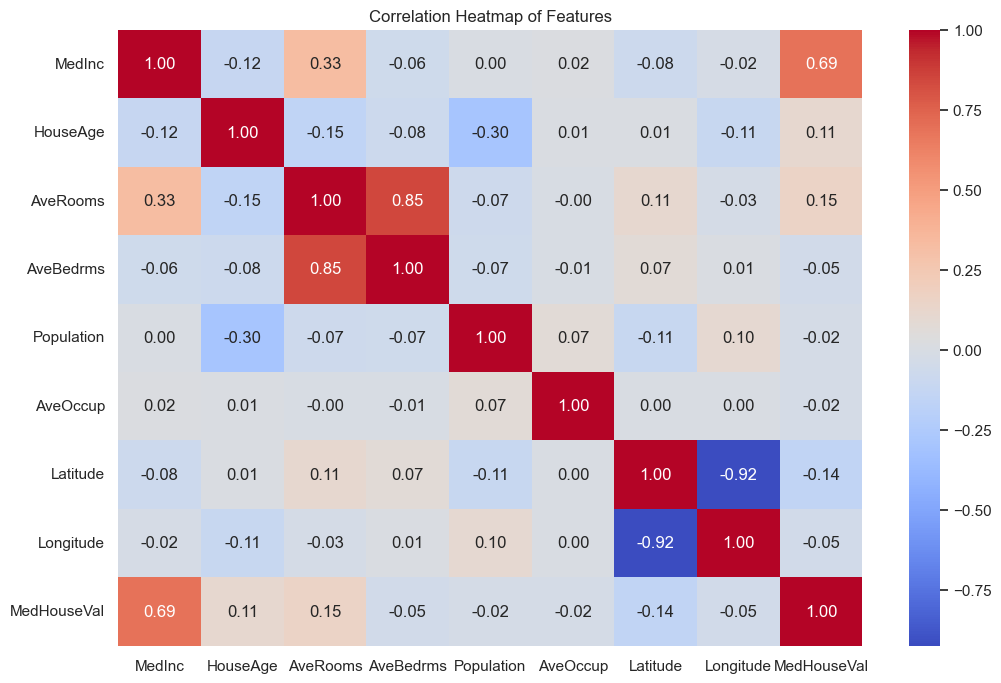

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(housing_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

## Step 5: Separate features and target
Split the data into input features (X) and the target variable (y) which is the median house value.


In [8]:
X = housing_df.drop('MedHouseVal', axis=1)
y = housing_df['MedHouseVal']

## Step 6: Train-test split
Split the data into training (80%) and testing (20%) sets to evaluate model performance on unseen data.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 7: Train the model
Use Linear Regression to fit the training data.

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Step 8: Predict on test set
Use the trained model to predict house prices on the test data.

In [11]:
y_pred = model.predict(X_test)

## Step 9: Model evaluation
Calculate Mean Squared Error (MSE) and R-squared (R²) score to evaluate prediction accuracy.

In [20]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")


Mean Squared Error: 0.5559
R-squared Score: 0.5758


## Step 10: Actual vs predicted plot
Visualize how close the predicted prices are to the actual values. The red dashed line represents perfect predictions.

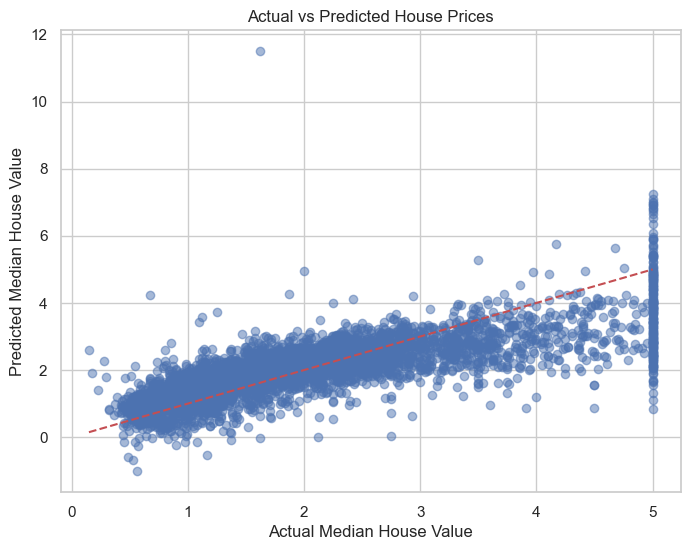

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted House Prices")
plt.show()